In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 
import numpy as np
from PIL import Image
import glob
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as colors

'''
c = 0
width = 1000
height = 1000
path = '/content/gdrive/My Drive/DATA SET/isic2019/images/'
print(path)
#Snippet for finding the minimal image dimensions and scaling all the images to it's dimensions.

print("We are starting right now")
c = 0
c1 = 0
c2 = 0
c3 = 0
c4 = 0

for filename in glob.glob(path+'official/*.jpg'):
  c = c+1
  print(c)
  if(filename[-17]=='/'):
    c1 = c1 + 1
    #img.save(path+'resizedImages/'+filename[-16:])
  elif(filename[-21]=='/'):
    c2 = c2 + 1
    #img.save(path+'resizedImages/'+filename[-20:])
  elif(filename[-29]=='/'):
    c3 = c3 + 1
    #img.save(path+'resizedImages/'+filename[-28:])
  elif filename[-33]=='/' :
    c4 = c4 + 1
    #img.save(path+'resizedImages/'+filename[-32:])
  
print(c)
print(c1+c2+c3+c4)
print(c1,c2,c3,c4)
'''
'''
img = Image.open(filename)
if(width>img.size[0]):
  width = img.size[0]
if(height>img.size[1]):
  height = img.size[1]
'''

#print(c)
'''
c = 0
for filename in glob.glob(path+'official/*.jpg'):
  c = c+1
  print(c)
  img = Image.open(filename)
  img = img.resize((width,height), Image.ANTIALIAS)
  if(filename[-17]=='/'):
    img.save(path+'resizedImages/'+filename[-16:])
  elif(filename[-21]=='/'):
    img.save(path+'resizedImages/'+filename[-20:])
  elif(filename[-29]=='/'):
    img.save(path+'resizedImages/'+filename[-28:])
  elif filename[-33]=='/' :
    img.save(path+'resizedImages/'+filename[-32:])

c = 0
print('Yo')
for filename in glob.glob(path+'resizedImages/*.jpg'):
  c = c+1
  print(c)
  if c==30:
    break
  img = Image.open(filename)
  print(img.size[0],img.size[1])

dictionaryOfLabels = {}
with open('/content/gdrive/My Drive/DATA SET/isic2019/labels/ISIC_2019_Training_GroundTruth.csv') as csvFile:
  reader = csv.reader(csvFile)
  for row in reader:
    for j in range(0,len(row)):
      if row[j] == '1.0':
        dictionaryOfLabels[row[0]] = j-1  
    
print(dictionaryOfLabels)

'''

In [0]:

#Grayscaling the resized images
c = 0
for filename in glob.glob(path+'resizedImages/*.jpg'):
  c = c+1
  print(c)
  if(c==2001):
    break
  img = Image.open(filename).convert('L')
  img.save(path+'grayScaleImages/'+filename.split('/')[-1])
  
print('finished')
#Converting each image into an numpy array!
c = 0
listOfImageData = []
listOfImageLabels = []
for filename in glob.glob(path + 'grayScaleImages/*.jpg'):
  img = Image.open(filename)
  imageArray = np.array(img)
  listOfImageData.append(imageArray)
  filename = str(filename.split('/')[-1])
  filename = filename.split('.')[0]
  filename = filename.split(' ')[0]
  listOfImageLabels.append(dictionaryOfLabels[filename])
  c = c+1
  if(c==2000):
    break

imageArray = np.array(listOfImageData)
imageArray = imageArray.reshape(imageArray.shape[0],imageArray.shape[1],imageArray.shape[2],1)
imageArray = imageArray.astype('float32')
print(imageArray.ndim)

y = [keras.utils.to_categorical(listOfImageLabels,9)]
print(y)


model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),input_shape = imageArray.shape[1:],activation = tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
print("Conv 1 is done")
model.add(Conv2D(64, kernel_size=(3,3), activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
print("Conv 2 is done")
model.add(Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
print("Conv 3 is done")
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu))
print("Flattening done")
model.add(Dropout(0.2))
model.add(Dense(9,activation =tf.nn.softmax)) 
print("Ready for the output")
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['acc'])
model.fit(imageArray,y,epochs = 20,batch_size=3)



KeyboardInterrupt: ignored

In [0]:
#model.save_weights('/contents/drive/My Drive/DATA SET/isic2019/new.h5')


In [0]:
#model.save('/contents/drive/My Drive/DATA SET/isic2019/recent.h5')

<class 'PIL.JpegImagePlugin.JpegImageFile'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


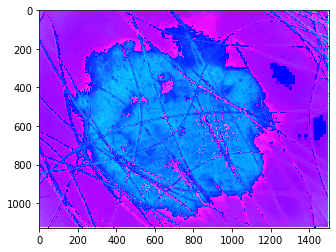

In [0]:
path = '/content/gdrive/My Drive/DATA SET/ISIC2018_Task1-2_Training_Input/ISIC_0000043.jpg'
img = Image.open(path)
print(type(img))
#arr = np.array(img)
arr = colors.rgb_to_hsv(img)
plt.imshow(arr)

In [0]:

img2 = median_filter(arr,3)
#img3 = median_filter(arr,5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.2857142984867096
<class 'numpy.ndarray'>
done 0


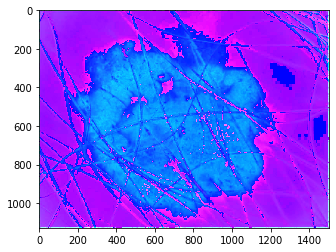

In [0]:
print(img2[0][0][0])
#plt.imshow(img)
plt.imshow(img2)
import colorsys

img4 = colors.hsv_to_rgb(img2)
print(type(img4))
count = 0 
for i in range(len(img2)):
  for j in range(len(img2[0])):
    img4[i][j][0],img4[i][j][1],img4[i][j][2] = colorsys.hsv_to_rgb(img2[i][j][0],img2[i][j][1],img2[i][j][2])
    if(img4[i][j][0] > 255 or img4[i][j][1] > 255 or img4[i][j][2] > 255 ):
      count = count + 1

print("done",count)
#img5 = colors.hsv_to_rgb(img3)
#img.ndim()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


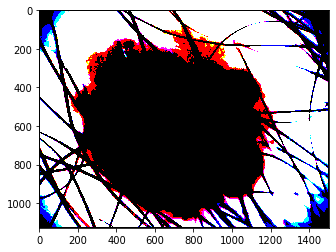

In [0]:
plt.imshow(img4-200)

In [0]:
img5


array([[[  1.98746867,   2.        ,   1.98245614],
        [  1.98746867,   2.        ,   1.98245614],
        [  1.97759103,   2.        ,   1.96862745],
        ...,
        [  1.99215686,   2.        ,   1.99607843],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ]],

       [[  1.95983936,   2.        ,   1.95983936],
        [ 24.50000001,  25.        ,  24.50000004],
        [  8.72489083,   9.        ,   8.72489085],
        ...,
        [ 10.78431372,  11.        ,  10.89215685],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ]],

       [[  6.99999999,   9.        ,   7.99999987],
        [ 23.00000004,  25.        ,  23.9999999 ],
        [ 41.9999999 ,  47.        ,  43.00000015],
        ...,
        [ 18.07142852,  19.05714305,  23.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ]],

       ...,

      